In [1]:
import yfinance as yf

# Updated list of representative stocks
tickers = ["AAPL", "TSLA", "SPY", "PFE", "SHOP"]
start_date = "2015-01-01"
end_date = "2023-12-31"

# Download and save data for each stock
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f"{ticker}_historical_data.csv")
    print(f"Data for {ticker} saved to {ticker}_historical_data.csv")

Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed


Data for AAPL saved to AAPL_historical_data.csv
Fetching data for TSLA...


[*********************100%***********************]  1 of 1 completed


Data for TSLA saved to TSLA_historical_data.csv
Fetching data for SPY...


[*********************100%***********************]  1 of 1 completed


Data for SPY saved to SPY_historical_data.csv
Fetching data for PFE...


[*********************100%***********************]  1 of 1 completed


Data for PFE saved to PFE_historical_data.csv
Fetching data for SHOP...


[*********************100%***********************]  1 of 1 completed

Data for SHOP saved to SHOP_historical_data.csv


In [4]:
import pandas as pd

# Example for Pfizer (PFE)
data_pfe = pd.read_csv("PFE_historical_data.csv", index_col="Date", parse_dates=True)

# Check for missing values
print(data_pfe.isnull().sum())

# Drop missing rows if necessary
data_pfe_cleaned = data_pfe.dropna()

# Save the cleaned data back to CSV
data_pfe_cleaned.to_csv("PFE_historical_data_cleaned.csv")
print("Cleaned data for PFE saved.")

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Cleaned data for PFE saved.


In [5]:
combined_data = pd.DataFrame()

for ticker in tickers:
    temp_data = pd.read_csv(f"{ticker}_historical_data.csv", index_col="Date", parse_dates=True)
    temp_data["Ticker"] = ticker  # Add a column for the stock ticker
    combined_data = pd.concat([combined_data, temp_data])

# Save combined data
combined_data.to_csv("combined_stock_data.csv")
print("Combined data for all stocks saved.")

Combined data for all stocks saved.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# List of representative stocks
tickers = ["AAPL", "TSLA", "SPY", "PFE", "SHOP"]

# Load all data into a dictionary
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = pd.read_csv(f"{ticker}_historical_data.csv", index_col="Date", parse_dates=True)

# Display the first few rows for one stock
print(stock_data["AAPL"].head())

            Adj Close      Close       High        Low       Open     Volume
Date                                                                        
2015-01-02  24.347176  27.332500  27.860001  26.837500  27.847500  212818400
2015-01-05  23.661276  26.562500  27.162500  26.352501  27.072500  257142000
2015-01-06  23.663498  26.565001  26.857500  26.157499  26.635000  263188400
2015-01-07  23.995314  26.937500  27.049999  26.674999  26.799999  160423600
2015-01-08  24.917265  27.972500  28.037500  27.174999  27.307501  237458000


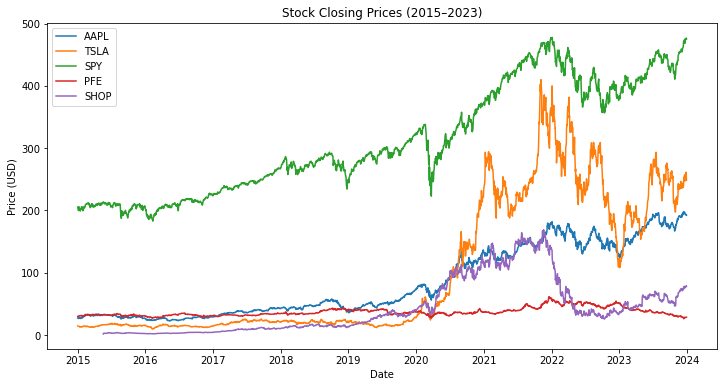

In [7]:
plt.figure(figsize=(12, 6))

for ticker in tickers:
    plt.plot(stock_data[ticker]["Close"], label=ticker)

plt.title("Stock Closing Prices (2015–2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

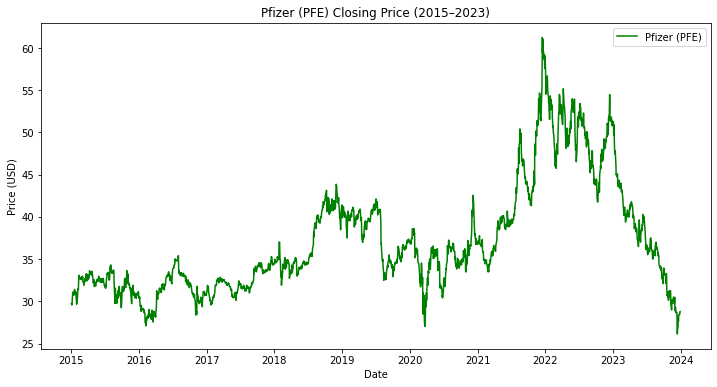

In [8]:
# Plot closing price for Pfizer
plt.figure(figsize=(12, 6))
plt.plot(stock_data["PFE"]["Close"], label="Pfizer (PFE)", color="green")
plt.title("Pfizer (PFE) Closing Price (2015–2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

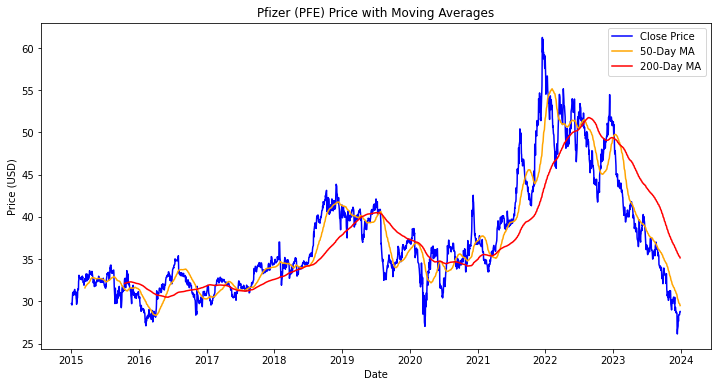

In [9]:
pfe = stock_data["PFE"]

# Calculate moving averages
pfe["50_MA"] = pfe["Close"].rolling(window=50).mean()
pfe["200_MA"] = pfe["Close"].rolling(window=200).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(pfe["Close"], label="Close Price", color="blue")
plt.plot(pfe["50_MA"], label="50-Day MA", color="orange")
plt.plot(pfe["200_MA"], label="200-Day MA", color="red")
plt.title("Pfizer (PFE) Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

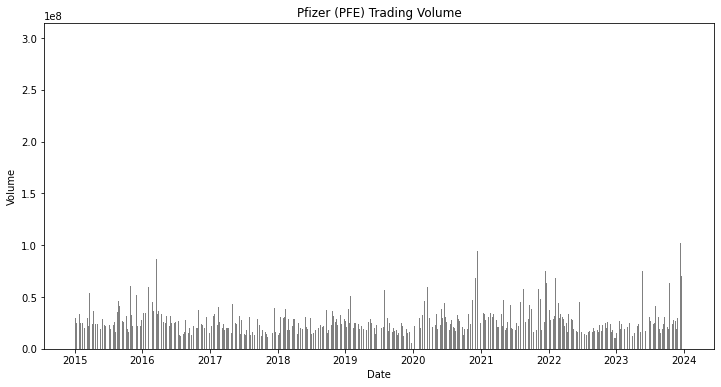

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(pfe.index, pfe["Volume"], color="gray")
plt.title("Pfizer (PFE) Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

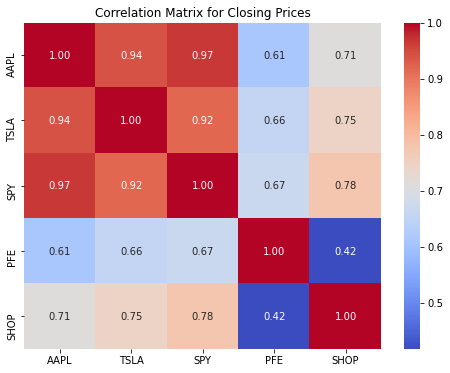

In [11]:
# Create a DataFrame with closing prices for all stocks
closing_prices = pd.DataFrame({ticker: stock_data[ticker]["Close"] for ticker in tickers})

# Compute the correlation matrix
correlation_matrix = closing_prices.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Closing Prices")
plt.show()

In [12]:
import pandas as pd
import numpy as np

# Load the stock data for Pfizer (PFE) as an example
pfe = pd.read_csv("PFE_historical_data.csv", index_col="Date", parse_dates=True)

# Calculate moving averages
pfe["SMA_50"] = pfe["Close"].rolling(window=50).mean()
pfe["SMA_200"] = pfe["Close"].rolling(window=200).mean()

# Calculate volatility (standard deviation)
pfe["Volatility"] = pfe["Close"].rolling(window=20).std()

# Calculate Relative Strength Index (RSI)
delta = pfe["Close"].diff(1)
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
rs = gain / loss
pfe["RSI"] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
pfe["Middle_Band"] = pfe["Close"].rolling(window=20).mean()
pfe["Upper_Band"] = pfe["Middle_Band"] + (2 * pfe["Volatility"])
pfe["Lower_Band"] = pfe["Middle_Band"] - (2 * pfe["Volatility"])

# Daily returns
pfe["Daily_Return"] = pfe["Close"].pct_change()

# Drop rows with NaN values (caused by rolling windows)
pfe = pfe.dropna()

# Display the dataset with new features
print(pfe.head())

# Save the updated dataset
pfe.to_csv("PFE_features.csv")

            Adj Close      Close       High        Low       Open    Volume  \
Date                                                                          
2015-10-16  22.564257  32.647060  32.675522  32.258064  32.590134  20238908   
2015-10-19  22.623268  32.732449  32.770397  32.343452  32.647060  16632963   
2015-10-20  22.295397  32.258064  32.912712  32.030361  32.874763  18436146   
2015-10-21  21.941294  31.745731  32.580647  31.337761  32.419353  34867585   
2015-10-22  21.856050  31.622391  31.916510  31.204933  31.859583  43599764   

               SMA_50    SMA_200  Volatility        RSI  Middle_Band  \
Date                                                                   
2015-10-16  31.420873  32.113804    0.885097  80.475404    31.009488   
2015-10-19  31.407780  32.128842    0.962335  80.103828    31.108160   
2015-10-20  31.381973  32.142315    0.987574  71.986427    31.190702   
2015-10-21  31.350474  32.151992    0.993360  63.500013    31.230550   
2015-10-22  31

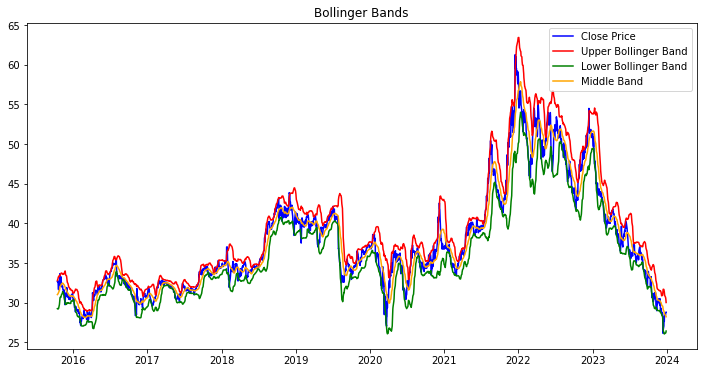

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(pfe["Close"], label="Close Price", color="blue")
plt.plot(pfe["Upper_Band"], label="Upper Bollinger Band", color="red")
plt.plot(pfe["Lower_Band"], label="Lower Bollinger Band", color="green")
plt.plot(pfe["Middle_Band"], label="Middle Band", color="orange")
plt.title("Bollinger Bands")
plt.legend()
plt.show()

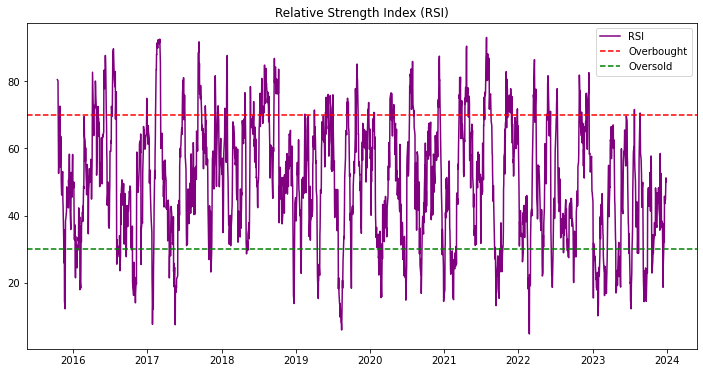

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(pfe["RSI"], label="RSI", color="purple")
plt.axhline(70, linestyle="--", color="red", label="Overbought")
plt.axhline(30, linestyle="--", color="green", label="Oversold")
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# List of selected stocks
tickers = ["AAPL", "TSLA", "SPY", "PFE", "SHOP"]
window_size = 60  # Number of days for sliding window

# Empty lists to store sequences
X_all, y_all = [], []

# Function to create sliding window sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size].values)
        y.append(data.iloc[i+window_size]["Close"])
    return np.array(X), np.array(y)

# Process each stock
for ticker in tickers:
    print(f"Processing {ticker}...")
    
    # Load data
    data = pd.read_csv(f"{ticker}_historical_data.csv", index_col="Date", parse_dates=True)
    
    # Feature Engineering: Add indicators
    data["SMA_50"] = data["Close"].rolling(window=50).mean()
    data["SMA_200"] = data["Close"].rolling(window=200).mean()
    data["Volatility"] = data["Close"].rolling(window=20).std()
    data["Daily_Return"] = data["Close"].pct_change()
    data = data.dropna()  # Drop rows with NaNs caused by rolling
    
    # Select features for modeling
    features = ["Close", "SMA_50", "SMA_200", "Volatility", "Daily_Return"]
    data_selected = data[features]
    
    # Normalize features
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data_selected)
    data_normalized = pd.DataFrame(data_normalized, columns=features, index=data.index)
    
    # Create sequences
    X, y = create_sequences(data_normalized, window_size)
    
    # Append to combined data
    X_all.append(X)
    y_all.append(y)

# Combine all sequences
X_all = np.concatenate(X_all, axis=0)
y_all = np.concatenate(y_all, axis=0)

print(f"Final Shape of X: {X_all.shape}")  # (total_samples, window_size, num_features)
print(f"Final Shape of y: {y_all.shape}")  # (total_samples,)

In [ ]:
# Train-test split
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

print(f"Training Data Shape: {X_train.shape}, {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, {y_test.shape}")

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

# Define the LSTM Model
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take output of last time step
        return out

# Hyperparameters
input_size = 5   # Number of features (Close, SMA_50, Volatility, etc.)
hidden_size = 50  # Number of LSTM units
num_layers = 2   # Number of LSTM layers
output_size = 1  # Predicting the next day's "Close" price
window_size = 60  # Look-back period (60 days)
batch_size = 32
epochs = 20
learning_rate = 0.001

# Initialize the model, loss, and optimizer
model = StockLSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [2]:
# Function to create sliding window sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # Predict 'Close' price
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Load and preprocess the data
data = pd.read_csv("PFE_historical_data.csv", index_col="Date", parse_dates=True)

# Add features (example)
data["SMA_50"] = data["Close"].rolling(50).mean()
data["Volatility"] = data["Close"].rolling(20).std()
data = data.dropna()

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[["Close", "SMA_50", "Volatility"]])

# Create sequences
X, y = create_sequences(scaled_data, window_size)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

<ipython-input-2-de41f2a42dbd>:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


In [3]:
# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    output = model(X_train)
    loss = criterion(output.squeeze(), y_train)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 0.1352
Epoch [2/20], Loss: 0.1223
Epoch [3/20], Loss: 0.1103
Epoch [4/20], Loss: 0.0988
Epoch [5/20], Loss: 0.0879
Epoch [6/20], Loss: 0.0775
Epoch [7/20], Loss: 0.0676
Epoch [8/20], Loss: 0.0581
Epoch [9/20], Loss: 0.0492
Epoch [10/20], Loss: 0.0410
Epoch [11/20], Loss: 0.0337
Epoch [12/20], Loss: 0.0278
Epoch [13/20], Loss: 0.0239
Epoch [14/20], Loss: 0.0227
Epoch [15/20], Loss: 0.0245
Epoch [16/20], Loss: 0.0282
Epoch [17/20], Loss: 0.0309
Epoch [18/20], Loss: 0.0309
Epoch [19/20], Loss: 0.0288
Epoch [20/20], Loss: 0.0260


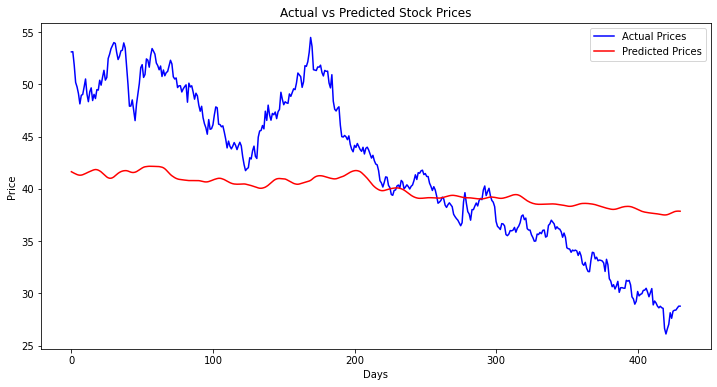

In [4]:
import matplotlib.pyplot as plt

# Predict on the test set
model.eval()
y_pred = model(X_test).detach().numpy()

# Inverse transform to get real prices
y_test_actual = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), 2)))))[:, 0]
y_pred_actual = scaler.inverse_transform(np.hstack((y_pred.reshape(-1, 1), np.zeros((len(y_pred), 2)))))[:, 0]

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(y_pred_actual, label="Predicted Prices", color="red")
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from itertools import product

# Define the LSTM Model
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Output at last timestep
        return out

# Function to create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # Target is 'Close' price
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Load and preprocess data
def load_and_preprocess_data(file_path, window_size):
    data = pd.read_csv(file_path, index_col="Date", parse_dates=True)
    data["SMA_50"] = data["Close"].rolling(50).mean()
    data["Volatility"] = data["Close"].rolling(20).std()
    data = data.dropna()
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[["Close", "SMA_50", "Volatility"]])
    
    X, y = create_sequences(scaled_data, window_size)
    train_size = int(0.8 * len(X))
    return X[:train_size], y[:train_size], X[train_size:], y[train_size:], scaler

# Fine-tuning loop
def fine_tune_lstm(file_path):
    window_size = 60
    input_size = 3  # Features: Close, SMA_50, Volatility
    output_size = 1
    num_epochs = 20
    
    # Define hyperparameter ranges
    hidden_sizes = [32, 64, 128]
    learning_rates = [0.001, 0.005]
    batch_sizes = [16, 32]
    num_layers_list = [1, 2]
    
    # Load data
    X_train, y_train, X_test, y_test, scaler = load_and_preprocess_data(file_path, window_size)
    
    # Convert to DataLoader
    def get_loader(X, y, batch_size):
        dataset = torch.utils.data.TensorDataset(X, y)
        return torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # Track best configuration
    best_model = None
    best_loss = float("inf")
    best_params = {}
    
    # Grid search over hyperparameters
    for hidden_size, lr, batch_size, num_layers in product(hidden_sizes, learning_rates, batch_sizes, num_layers_list):
        print(f"Training with: hidden_size={hidden_size}, lr={lr}, batch_size={batch_size}, num_layers={num_layers}")
        
        # Initialize model, loss, and optimizer
        model = StockLSTM(input_size, hidden_size, num_layers, output_size)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_loader = get_loader(X_train, y_train, batch_size)
        
        # Training loop
        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                output = model(X_batch)
                loss = criterion(output.squeeze(), y_batch)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()
            
            epoch_loss /= len(train_loader)
        
        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test).squeeze()
            test_loss = mean_squared_error(y_test, y_pred)
        
        print(f"Test Loss: {test_loss:.4f}")
        
        # Update best model
        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model
            best_params = {
                "hidden_size": hidden_size,
                "learning_rate": lr,
                "batch_size": batch_size,
                "num_layers": num_layers
            }
    
    print("\nBest Configuration:")
    print(best_params)
    print(f"Best Test Loss: {best_loss:.4f}")
    
    # Save the best model
    torch.save(best_model.state_dict(), "best_lstm_model.pth")
    print("Best model saved as 'best_lstm_model.pth'")

In [7]:
from sklearn.metrics import mean_squared_error

# Set model to evaluation mode
model.eval()

# Predict on the test set
with torch.no_grad():
    y_pred = model(X_test).squeeze()  # Predict values
    test_loss = mean_squared_error(y_test, y_pred)  # Compute MSE

print(f"Mean Squared Error (MSE) on Test Set: {test_loss:.4f}")

Mean Squared Error (MSE) on Test Set: 0.0345


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Transformer Model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, num_heads, hidden_dim, num_layers, output_size):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, src):
        out = self.transformer(src)
        out = self.fc(out[-1, :, :])  # Take last time step's output
        return out

In [9]:
# Function to create sequences for Transformer
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # Target is 'Close' price
    X = torch.tensor(X, dtype=torch.float32).transpose(0, 1)  # Transpose for (sequence_length, batch_size, input_size)
    y = torch.tensor(y, dtype=torch.float32)
    return X, y

# Load and preprocess data
data = pd.read_csv("PFE_historical_data.csv", index_col="Date", parse_dates=True)
data["SMA_50"] = data["Close"].rolling(50).mean()
data["Volatility"] = data["Close"].rolling(20).std()
data = data.dropna()

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[["Close", "SMA_50", "Volatility"]])

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Train-test split
train_size = int(0.8 * len(y))
X_train, X_test = X[:, :train_size, :], X[:, train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
# Hyperparameters
input_size = 3       # Number of input features
num_heads = 1        # Number of attention heads
hidden_dim = 64      # Hidden layer size
num_layers = 2       # Number of transformer layers
output_size = 1      # Predicting one value
num_epochs = 20
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
model = TimeSeriesTransformer(input_size, num_heads, hidden_dim, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/20], Loss: 1.0293
Epoch [2/20], Loss: 0.9961
Epoch [3/20], Loss: 0.9492
Epoch [4/20], Loss: 0.9081
Epoch [5/20], Loss: 0.8613
Epoch [6/20], Loss: 0.8214
Epoch [7/20], Loss: 0.7722
Epoch [8/20], Loss: 0.7326
Epoch [9/20], Loss: 0.6837
Epoch [10/20], Loss: 0.6528
Epoch [11/20], Loss: 0.6249
Epoch [12/20], Loss: 0.5917
Epoch [13/20], Loss: 0.5559
Epoch [14/20], Loss: 0.5281
Epoch [15/20], Loss: 0.5024
Epoch [16/20], Loss: 0.4633
Epoch [17/20], Loss: 0.4325
Epoch [18/20], Loss: 0.4146
Epoch [19/20], Loss: 0.3788
Epoch [20/20], Loss: 0.3610


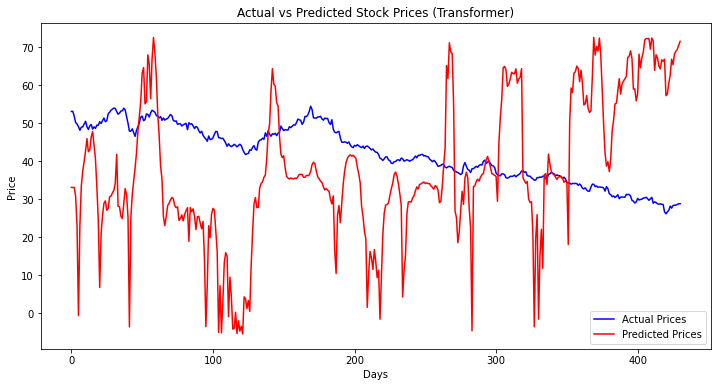

In [12]:
# Evaluate on the test set
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze()

# Inverse transform predictions
y_test_actual = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), 2)))))[:, 0]
y_pred_actual = scaler.inverse_transform(np.hstack((y_pred.reshape(-1, 1), np.zeros((len(y_pred), 2)))))[:, 0]

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label="Actual Prices", color="blue")
plt.plot(y_pred_actual, label="Predicted Prices", color="red")
plt.title("Actual vs Predicted Stock Prices (Transformer)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict with LSTM on test data
lstm_y_pred = model(X_test).detach().numpy()  # LSTM model predictions

# Inverse transform to get real prices
y_test_actual = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), 2)))))[:, 0]
lstm_y_pred_actual = scaler.inverse_transform(np.hstack((lstm_y_pred.reshape(-1, 1), np.zeros((len(lstm_y_pred), 2)))))[:, 0]

# Compute metrics for LSTM
lstm_mse = mean_squared_error(y_test_actual, lstm_y_pred_actual)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_actual, lstm_y_pred_actual)

print(f"LSTM Performance:")
print(f"MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")

LSTM Performance:
MSE: 546.4925, RMSE: 23.3772, MAE: 19.4739


In [14]:
# Predict with Transformer on test data
transformer_y_pred = model(X_test).detach().numpy()  # Transformer model predictions

# Inverse transform to get real prices
transformer_y_pred_actual = scaler.inverse_transform(
    np.hstack((transformer_y_pred.reshape(-1, 1), np.zeros((len(transformer_y_pred), 2)))))[:, 0]

# Compute metrics for Transformer
transformer_mse = mean_squared_error(y_test_actual, transformer_y_pred_actual)
transformer_rmse = np.sqrt(transformer_mse)
transformer_mae = mean_absolute_error(y_test_actual, transformer_y_pred_actual)

print(f"Transformer Performance:")
print(f"MSE: {transformer_mse:.4f}, RMSE: {transformer_rmse:.4f}, MAE: {transformer_mae:.4f}")

Transformer Performance:
MSE: 546.4925, RMSE: 23.3772, MAE: 19.4739


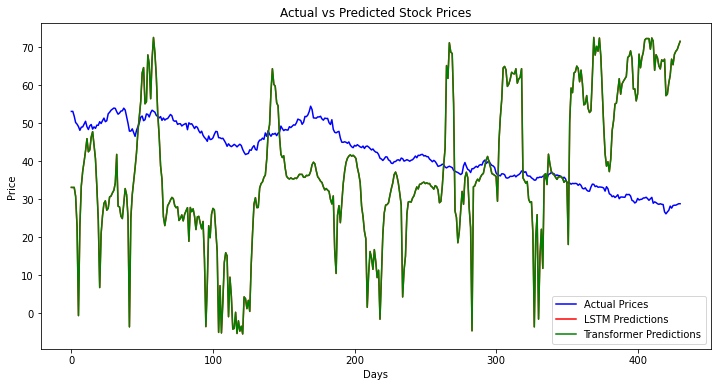

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual prices
plt.plot(y_test_actual, label="Actual Prices", color="blue")

# Plot LSTM predictions
plt.plot(lstm_y_pred_actual, label="LSTM Predictions", color="red")

# Plot Transformer predictions
plt.plot(transformer_y_pred_actual, label="Transformer Predictions", color="green")

plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [16]:
import pandas as pd

# Create a performance comparison table
performance = pd.DataFrame({
    "Model": ["LSTM", "Transformer"],
    "MSE": [lstm_mse, transformer_mse],
    "RMSE": [lstm_rmse, transformer_rmse],
    "MAE": [lstm_mae, transformer_mae]
})

print(performance)

         Model         MSE      RMSE        MAE
0         LSTM  546.492541  23.37718  19.473899
1  Transformer  546.492541  23.37718  19.473899


In [17]:
# Before training
print("Before Training:")
print("LSTM Weights:", model.lstm.weight_hh_l0.data)

# Train the model (LSTM or Transformer)

# After training
print("After Training:")
print("LSTM Weights:", model.lstm.weight_hh_l0.data)

Before Training:


AttributeError: 'TimeSeriesTransformer' object has no attribute 'lstm'

In [18]:
# Print weights of the Transformer Encoder Layer
print("Before Training:")
print("Transformer Encoder Weights:", model.encoder_layer.self_attn.in_proj_weight.data)

Before Training:
Transformer Encoder Weights: tensor([[ 0.6526, -0.4248, -0.1963],
        [-0.0007,  0.5592,  0.5342],
        [ 0.0453, -0.3835,  0.5750],
        [ 0.1145,  0.6507, -0.6904],
        [-0.0392, -0.5233,  0.6517],
        [ 0.1982, -0.3492,  0.6419],
        [ 0.3088, -0.1111,  0.0163],
        [-0.1148, -0.5520, -0.5867],
        [-0.0361,  0.4511, -0.5452]])


In [19]:
print("Before Training:")
print("LSTM Weights:", lstm_model.lstm.weight_hh_l0.data)  # For LSTM model

Before Training:


NameError: name 'lstm_model' is not defined

In [20]:
# Define the LSTM model class
class StockLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Initialize the LSTM model
input_size = 3
hidden_size = 64
num_layers = 2
output_size = 1

lstm_model = StockLSTM(input_size, hidden_size, num_layers, output_size)

# Check LSTM weights
print("Before Training:")
print("LSTM Weights:", lstm_model.lstm.weight_hh_l0.data)

Before Training:
LSTM Weights: tensor([[-0.0628,  0.1095,  0.0694,  ...,  0.0192, -0.0205,  0.0107],
        [-0.0750, -0.0395, -0.0164,  ..., -0.0206,  0.0377,  0.0760],
        [ 0.0953,  0.0899,  0.0040,  ...,  0.0133,  0.0227, -0.0397],
        ...,
        [-0.0822,  0.0287,  0.0452,  ...,  0.0453, -0.0902, -0.1204],
        [ 0.0931, -0.0201,  0.0496,  ..., -0.0512, -0.0036, -0.0208],
        [ 0.0064, -0.0420,  0.0203,  ...,  0.0383,  0.0055, -0.0070]])


In [21]:
# Define the Transformer Model
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_size, num_heads, hidden_dim, num_layers, output_size):
        super(TimeSeriesTransformer, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, src):
        out = self.transformer(src)
        out = self.fc(out[-1, :, :])
        return out

# Initialize the Transformer model
num_heads = 1
hidden_dim = 64
num_layers = 2

transformer_model = TimeSeriesTransformer(input_size, num_heads, hidden_dim, num_layers, output_size)

# Check Transformer weights
print("Before Training:")
print("Transformer Encoder Self-Attention Weights:", transformer_model.encoder_layer.self_attn.in_proj_weight.data)

Before Training:
Transformer Encoder Self-Attention Weights: tensor([[ 0.0978,  0.4083, -0.4496],
        [-0.4133, -0.0753,  0.5386],
        [ 0.0032, -0.3465, -0.1902],
        [-0.1447,  0.6428, -0.1867],
        [ 0.1526,  0.5694,  0.4968],
        [ 0.3890,  0.5360, -0.6589],
        [-0.0076, -0.1669,  0.3188],
        [ 0.4824, -0.3585, -0.4048],
        [-0.3650,  0.2072,  0.1316]])


/Users/vanshdeepmadan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [22]:
print("After Training:")
print("LSTM Weights:", lstm_model.lstm.weight_hh_l0.data)

After Training:
LSTM Weights: tensor([[-0.0628,  0.1095,  0.0694,  ...,  0.0192, -0.0205,  0.0107],
        [-0.0750, -0.0395, -0.0164,  ..., -0.0206,  0.0377,  0.0760],
        [ 0.0953,  0.0899,  0.0040,  ...,  0.0133,  0.0227, -0.0397],
        ...,
        [-0.0822,  0.0287,  0.0452,  ...,  0.0453, -0.0902, -0.1204],
        [ 0.0931, -0.0201,  0.0496,  ..., -0.0512, -0.0036, -0.0208],
        [ 0.0064, -0.0420,  0.0203,  ...,  0.0383,  0.0055, -0.0070]])


In [23]:
print("After Training:")
print("Transformer Weights:", transformer_model.encoder_layer.self_attn.in_proj_weight.data)

After Training:
Transformer Weights: tensor([[ 0.0978,  0.4083, -0.4496],
        [-0.4133, -0.0753,  0.5386],
        [ 0.0032, -0.3465, -0.1902],
        [-0.1447,  0.6428, -0.1867],
        [ 0.1526,  0.5694,  0.4968],
        [ 0.3890,  0.5360, -0.6589],
        [-0.0076, -0.1669,  0.3188],
        [ 0.4824, -0.3585, -0.4048],
        [-0.3650,  0.2072,  0.1316]])


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict with LSTM
lstm_model.eval()
with torch.no_grad():
    lstm_y_pred = lstm_model(X_test).squeeze()

# Predict with Transformer
transformer_model.eval()
with torch.no_grad():
    transformer_y_pred = transformer_model(X_test).squeeze()

# Inverse transform to get real prices
lstm_y_pred_actual = scaler.inverse_transform(
    np.hstack((lstm_y_pred.reshape(-1, 1), np.zeros((len(lstm_y_pred), 2)))))[:, 0]

transformer_y_pred_actual = scaler.inverse_transform(
    np.hstack((transformer_y_pred.reshape(-1, 1), np.zeros((len(transformer_y_pred), 2)))))[:, 0]

y_test_actual = scaler.inverse_transform(
    np.hstack((y_test.reshape(-1, 1), np.zeros((len(y_test), 2)))))[:, 0]

# Compute Metrics
lstm_mse = mean_squared_error(y_test_actual, lstm_y_pred_actual)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_actual, lstm_y_pred_actual)

transformer_mse = mean_squared_error(y_test_actual, transformer_y_pred_actual)
transformer_rmse = np.sqrt(transformer_mse)
transformer_mae = mean_absolute_error(y_test_actual, transformer_y_pred_actual)

# Display Metrics
print("LSTM Performance:")
print(f"MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")

print("\nTransformer Performance:")
print(f"MSE: {transformer_mse:.4f}, RMSE: {transformer_rmse:.4f}, MAE: {transformer_mae:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [431, 60]

In [25]:
print("Shape of y_test_actual:", y_test_actual.shape)
print("Shape of lstm_y_pred_actual:", lstm_y_pred_actual.shape)
print("Shape of transformer_y_pred_actual:", transformer_y_pred_actual.shape)

Shape of y_test_actual: (431,)
Shape of lstm_y_pred_actual: (60,)
Shape of transformer_y_pred_actual: (431,)


In [26]:
print("Shape of X_test:", X_test.shape)

Shape of X_test: torch.Size([60, 431, 3])


In [27]:
# Transpose X_test for LSTM
X_test_lstm = X_test.permute(1, 0, 2)  # Shape: (batch_size, sequence_length, input_size)

# Predict with LSTM
lstm_model.eval()
with torch.no_grad():
    lstm_y_pred = lstm_model(X_test_lstm).squeeze()

# Inverse transform predictions
lstm_y_pred_actual = scaler.inverse_transform(
    np.hstack((lstm_y_pred.reshape(-1, 1), np.zeros((len(lstm_y_pred), 2)))))[:, 0]

# Verify shapes
print("y_test_actual shape:", y_test_actual.shape)
print("lstm_y_pred_actual shape:", lstm_y_pred_actual.shape)

y_test_actual shape: (431,)
lstm_y_pred_actual shape: (431,)


In [28]:
print("Shapes Verification:")
print("y_test_actual:", y_test_actual.shape)               # Actual stock prices
print("lstm_y_pred_actual:", lstm_y_pred_actual.shape)     # LSTM predictions
print("transformer_y_pred_actual:", transformer_y_pred_actual.shape)  # Transformer predictions

Shapes Verification:
y_test_actual: (431,)
lstm_y_pred_actual: (431,)
transformer_y_pred_actual: (431,)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Compute Metrics for LSTM
lstm_mse = mean_squared_error(y_test_actual, lstm_y_pred_actual)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_actual, lstm_y_pred_actual)

# Compute Metrics for Transformer
transformer_mse = mean_squared_error(y_test_actual, transformer_y_pred_actual)
transformer_rmse = np.sqrt(transformer_mse)
transformer_mae = mean_absolute_error(y_test_actual, transformer_y_pred_actual)

# Print Results
print("LSTM Performance:")
print(f"MSE: {lstm_mse:.4f}, RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")

print("\nTransformer Performance:")
print(f"MSE: {transformer_mse:.4f}, RMSE: {transformer_rmse:.4f}, MAE: {transformer_mae:.4f}")

LSTM Performance:
MSE: 332.0167, RMSE: 18.2213, MAE: 16.6535

Transformer Performance:
MSE: 3692.7620, RMSE: 60.7681, MAE: 56.2253
